In [6]:
import os
import urllib.request
from dotenv import load_dotenv
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import scikitplot as skplt
%matplotlib inline

from amlutils import blobs_util as b_util
import mnist_util as m_util
import mnist_tf_train as m_train

In [8]:
print("Keras version:", keras.__version__)
print("Tensorflow version:", tf.__version__)

if tf.test.is_gpu_available(cuda_only=True, min_cuda_compute_capability=None):
    print('CUDA GPU available')
else:
    print('no CUDA GPU available')
if tf.test.is_built_with_cuda():
    print('TF was built with GPU support')
else:
    print('TF was not built with GPU support')

Keras version: 2.2.5
Tensorflow version: 1.13.1
no CUDA GPU available
TF was not built with GPU support


In [2]:
load_dotenv()

True

In [3]:
data_folder = os.getenv('DATA_LOCAL')
print(data_folder)

C:\\Users\\S0K8FJ\\Projects\\mnist


In [4]:
output_folder = os.getenv('OUTPUT_LOCAL')

WARNING - From c:\users\s0k8fj\projects\amldemo\venv\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
WARNING - From c:\users\s0k8fj\projects\amldemo\venv\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


(60000, 784)
(60000,)
(10000, 784)
(10000,)
(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 6s - loss: 0.5440 - acc: 0.8330 - val_loss: 0.3396 - val_acc: 0.9015
Attempted to log scalar metric Loss:
0.5440030148962979
Attempted to log scalar metric Accuracy:
0.8330333284847439
Epoch 2/20
 - 6s - loss: 0.3010 - acc: 

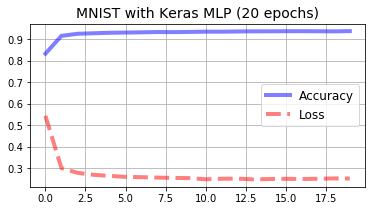

In [5]:
model = m_train.train(data_folder, output_folder, batch_size=10, n_hidden_1=10, n_hidden_2=10, learning_rate=0.001)

In [10]:
X_test = m_util.load_data(os.path.join(data_folder, 'test-images.gz'), False) / 255.0
y_test = m_util.load_data(os.path.join(data_folder, 'test-labels.gz'), True).reshape(-1)

In [11]:
# evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
y_test_ohe = np.eye(10)[y_test.reshape(-1)]
y_hat = np.argmax(model.predict(X_test), axis=1)

# print the first 30 labels and predictions
print('labels:  \t', y_test[:30])
print('predictions:\t', y_hat[:30])

labels:  	 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
predictions:	 [7 2 1 0 4 1 4 9 8 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [12]:
print("Accuracy on the test set:", np.average(y_hat == y_test))

Accuracy on the test set: 0.9335
